#Extração

In [ ]:
import requests
import json

url = https://github.com/ingridcristh/challenge2-data-science/blob/main/TelecomX_Data.json

resposta = requests.get(url)


In [ ]:
import pandas as pd
from pandas import json_normalize

dados = resposta.json()

df = json_normalize(dados, sep='_')

df.head()


,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
df.shape

(7267, 21)

## Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [ ]:
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [28]:
# df[['account_Charges_Monthly', 'customer_tenure']].describe()


In [29]:
# Verificando dados nulos
df.isnull().sum()

,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0
internet_OnlineSecurity,0


#Transformação

In [ ]:
df = df.drop('customerID', axis=1)

In [ ]:
df

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [ ]:
df = df[df['Churn'] != '']

In [ ]:
df.shape

(7043, 20)

In [ ]:
df.loc[:, 'Contas_Diarias'] = df['account_Charges_Monthly'].astype(float) / 30
df

/tmp/ipython-input-11-3454293411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Contas_Diarias'] = df['account_Charges_Monthly'].astype(float) / 30


,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,No,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7263,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7264,No,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [ ]:
df = df.reset_index(drop=True)
df

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Female,0,No,No,13,Yes,No,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7039,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7040,No,Male,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7041,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [ ]:
df_churn = df[df['Churn'] == 'Yes']

churn_genre=df_churn['customer_gender'].value_counts()

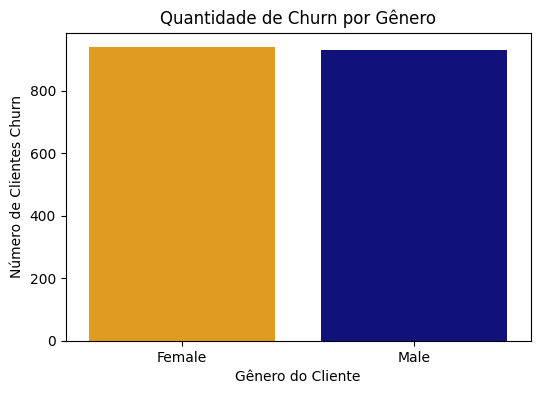

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import seaborn as sns
import matplotlib.pyplot as plt

# Define o mapeamento de cores por gênero
cores_genero = {'Female': 'orange', 'Male': 'darkblue'}

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_genre.index, y=churn_genre, palette=cores_genero)

plt.title('Quantidade de Churn por Gênero')
plt.xlabel('Gênero do Cliente')
plt.ylabel('Número de Clientes Churn')
plt.show()


In [ ]:
churn_etaria = df_churn['customer_SeniorCitizen'].value_counts().reset_index()
churn_etaria.columns = ['customer_SeniorCitizen', 'Count']
churn_etaria['customer_SeniorCitizen'] = churn_etaria['customer_SeniorCitizen'].map({0: 'Não Senior', 1: 'Senior'})

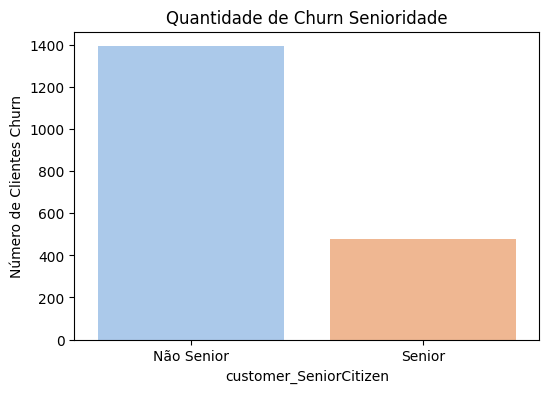

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=churn_etaria, x='customer_SeniorCitizen', y='Count', palette='pastel')

plt.title('Quantidade de Churn Senioridade')
plt.ylabel('Número de Clientes Churn')
plt.show()

In [ ]:
colunas_YN = ['Churn', 'customer_Partner', 'customer_Dependents','phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
                            'internet_OnlineSecurity', 'internet_DeviceProtection',	'internet_TechSupport',
                            'internet_StreamingTV', 	'internet_StreamingMovies', 'account_PaperlessBilling']

df[colunas_YN] = df[colunas_YN].replace({'Yes': 1, 'No': 0})
df[colunas_YN] = df[colunas_YN].infer_objects(copy=False)
df.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,Contas_Diarias
0,0,Female,0,1,1,9,1,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.186667
1,0,Male,0,0,0,9,1,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,1.996667
2,1,Male,0,0,0,4,1,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,1,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,1,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4,2.796667


#Carga e análise

In [ ]:
# Elegimos os 5 "principais" serviços oferecidos pela empresa
col_servicos = ['Churn', 'phone_PhoneService', 'internet_InternetService', 'internet_StreamingTV', 'internet_StreamingMovies']

df_servicos = df[col_servicos].copy()
df_servicos.head()


,Churn,phone_PhoneService,internet_InternetService,internet_StreamingTV,internet_StreamingMovies
0,0,1,DSL,1,0
1,0,1,DSL,0,1
2,1,1,Fiber optic,0,0
3,1,1,Fiber optic,1,1
4,1,1,Fiber optic,1,0


In [ ]:
df_servicos['internet_InternetService'] = df_servicos['internet_InternetService'].apply(lambda x: 0 if x == 0 else 1)
df_servicos['internet_StreamingTV'] = df_servicos['internet_StreamingTV'].apply(lambda x: x if x in [0, 1] else 0)
df_servicos['internet_StreamingMovies'] = df_servicos['internet_StreamingMovies'].apply(lambda x: x if x in [0, 1] else 0)

df_servicos

,Churn,phone_PhoneService,internet_InternetService,internet_StreamingTV,internet_StreamingMovies
0,0,1,1,1,0
1,0,1,1,0,1
2,1,1,1,0,0
3,1,1,1,1,1
4,1,1,1,1,0
...,...,...,...,...,...
7038,0,1,1,0,0
7039,1,1,1,0,1
7040,0,1,1,0,0
7041,0,1,1,0,1


In [ ]:
# df_servicos.to_excel('clientes.xlsx', index=False)

In [ ]:
servicos = ['phone_PhoneService', 'internet_InternetService', 'internet_StreamingTV', 'internet_StreamingMovies']

# Calcula a média de uso de cada serviço por grupo de churn
base_grafico = df_servicos.groupby('Churn')[servicos].mean().T
base_grafico.columns = ['Não Churn', 'Churn']
base_grafico

,Não Churn,Churn
phone_PhoneService,0.901044,0.909042
internet_InternetService,0.726904,0.939540
internet_StreamingTV,0.365868,0.435527
internet_StreamingMovies,0.369927,0.437667


Text(0.5, 1.0, 'Serviços')

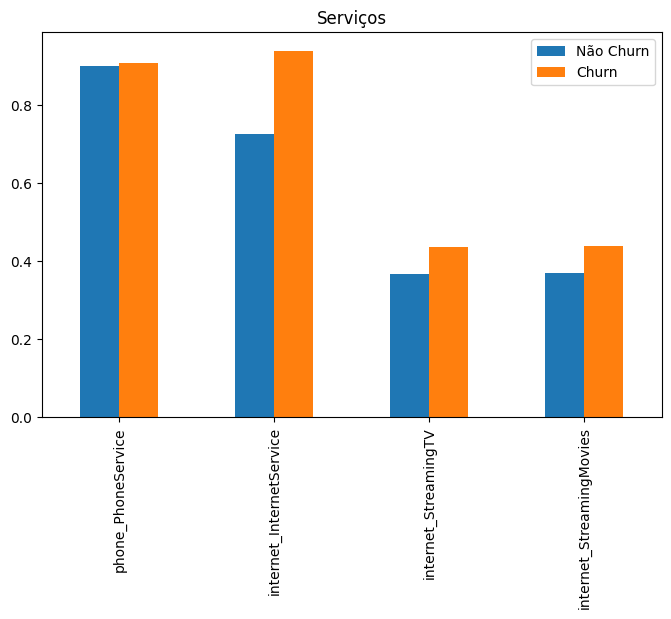

In [ ]:
base_grafico.plot(kind='bar', figsize=(8, 5), color=['#1f77b4', '#ff7f0e'])
plt.title('Serviços')

In [ ]:
# Pagamentos
col_pgto = ['Churn', 'account_Charges_Monthly']

df_despesas = df[col_pgto].copy()
df_despesas.head()

,Churn,account_Charges_Monthly
0,0,65.6
1,0,59.9
2,1,73.9
3,1,98.0
4,1,83.9


<Figure size 700x500 with 0 Axes>

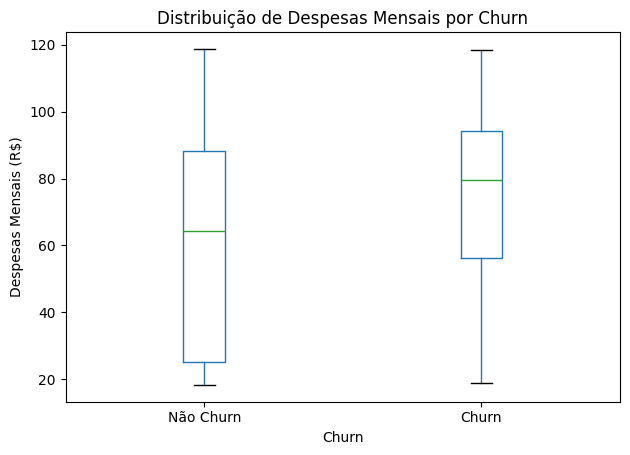

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
df_despesas.boxplot(column='account_Charges_Monthly', by='Churn', grid=False)
plt.title('Distribuição de Despesas Mensais por Churn')
plt.suptitle('')  # Remove o título automático do pandas
plt.xlabel('Churn')
plt.ylabel('Despesas Mensais (R$)')
plt.xticks([1, 2], ['Não Churn', 'Churn'])
plt.tight_layout()
plt.show()


In [ ]:
# Contratos
col_tenure = ['Churn', 'customer_tenure']

df_tenure = df[col_tenure].copy()
df_tenure.head()

,Churn,customer_tenure
0,0,9
1,0,9
2,1,4
3,1,13
4,1,3


<Figure size 700x500 with 0 Axes>

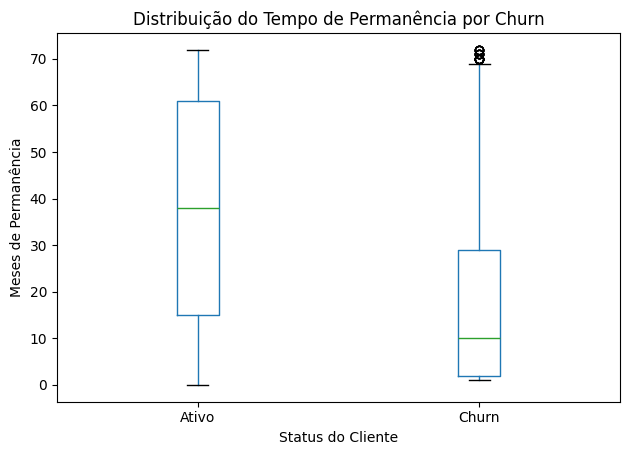

In [ ]:
# Boxplot
plt.figure(figsize=(7, 5))
df_tenure.boxplot(column='customer_tenure', by='Churn', grid=False)
plt.title('Distribuição do Tempo de Permanência por Churn')
plt.suptitle('')
plt.xlabel('Status do Cliente')
plt.ylabel('Meses de Permanência')
plt.xticks([1, 2], ['Ativo', 'Churn'])
plt.tight_layout()
plt.show()



In [ ]:
# Define os intervalos de 12 em 12 meses até 72 meses
bins = np.arange(0, 84, 12)  # Vai até 72, com passo de 12

plt.figure(figsize=(8, 5))
sns.histplot(data=df_tenure, x='customer_tenure', hue='Churn', multiple='stack', bins=bins)

plt.title('Distribuição de Tenure: Churn vs Ativo')
plt.xlabel('Tempo de Permanência (meses)')
plt.ylabel('Número de Clientes')
plt.xticks(bins)  # Define os ticks do eixo x de 12 em 12 meses
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

In [ ]:
df_tenure['faixa_tenure'] = pd.cut(df_tenure['customer_tenure'], bins=[0, 6, 12, 24, 48, 72], labels=['0-6','7-12','13-24','25-48','49-72'])

churn_por_faixa = df_tenure.groupby('faixa_tenure', observed=True)['Churn'].mean()

churn_por_faixa.plot(kind='bar', color='#ff7f0e', figsize=(7, 4))
plt.title('Taxa de Churn por Faixa de Tenure')
plt.ylabel('Proporção de Churn')
plt.xlabel('Faixa de Tempo de Permanência')
plt.tight_layout()
plt.show()



# **Relatório Analítico Integrado a Gráficos e Indicadores**

### 1. **Análise de Churn por Gênero**
📌 *Gráfico: Barras por gênero*

- As mulheres correspondem a uma parcela ligeiramente maior dos clientes que efetuam cancelamentos.
- As iniciativas de retenção podem ser direcionadas de maneira mais precisa às necessidades das clientes do gênero feminino.

---

### 2. **Análise de Churn por Faixa Etária**
📌 *Gráfico: Barras por senioridade*

- A maior parte dos clientes que cancelam não pertence à faixa etária sênior.
- Clientes mais jovens apresentam expectativas distintas em relação à flexibilidade e à tecnologia. Investir em comunicação digital eficiente e em benefícios ágeis pode contribuir para sua retenção.

---

### 3. **Análise de Churn por Serviços Utilizados**
📌 *Gráfico: Barras comparando uso médio de serviços*

| Serviço                  | Uso Médio - Não Churn | Uso Médio - Churn | Observação                          |
|--------------------------|------------------------|-------------------|-------------------------------------|
| Telefone                 | Alto                   | Alto              | Pouca diferença                     |
| Internet                 | Alto                   | Médio             | Menor uso entre churn               |
| Streaming TV             | Alto                   | Baixo             | Forte correlação com retenção       |
| Streaming Filmes         | Alto                   | Baixo             | Idem acima                          |

- Clientes engajados com serviços de entretenimento tendem a permanecer por mais tempo. Estratégias de bundles e vendas cruzadas podem potencializar essa retenção.

---

### 4. **Gastos Mensais**
📌 *Gráfico: Boxplot de `account_Charges_Monthly`*

- Os clientes que cancelam apresentam despesas mensais mais elevadas e maior variabilidade nos valores.
- Implementar planos com melhor custo-benefício ou descontos graduais pode contribuir para reduzir a evasão.

---

### 5. **Período de Fidelidade do Cliente(Tenure)**
📌 *Gráficos: Boxplot + Histograma + Barras por faixa*

- Clientes com menos de 12 meses de relacionamento apresentam maior taxa de churn.
- A taxa de churn diminui de forma significativa após 24 meses de permanência.

| Faixa de Tenure | Taxa de Churn |
|------------------|----------------|
| 0–6 meses        | Alta           |
| 7–12 meses       | Alta           |
| 13–24 meses      | Moderada       |
| 25–48 meses      | Baixa          |
| 49–72 meses      | Muito baixa    |

- Implementar programas de fidelidade e benefícios progressivos nos primeiros 12 meses pode ser determinante para a retenção.

---


##  **Ações Estratégias de Redução de Evasão**

1. Ações de Retenção Durante o Primeiro Ano de Relacionamento:
   - Implementar bônus escalonados para incentivar a permanência.
   - Adotar comunicação personalizada baseada no perfil do cliente.

2. Ofertas e Pacotes Promocionais de Entretenimento:
   - Oferecer bundles combinando streaming e segurança online.
   - Disponibilizar testes gratuitos para novos clientes, incentivando o engajamento.

3. Monitoramento Inteligente de Risco de Churn:
   - Configurar alertas automáticos para clientes com alto risco de churn, com base em modelos preditivos.
   - Executar ações proativas da equipe de atendimento visando retenção.

---
